In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


In [16]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,20.49,155106,9077,27605,5.85,17.80
중구,2333,78.98,132259,9243,23980,6.99,18.13
용산구,2383,78.64,240665,14287,38884,5.94,16.16
성동구,3602,46.13,295767,6605,45591,2.23,15.41
광진구,2588,112.29,355306,12825,50815,3.61,14.30


* 상관관계 분석

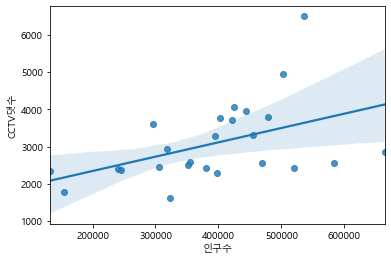

In [17]:
# cctv 대수 vs 인구수, 외국인비율, 고령자비율

sns.regplot(x = '인구수', y = 'CCTV댓수', data = df)
plt.show()

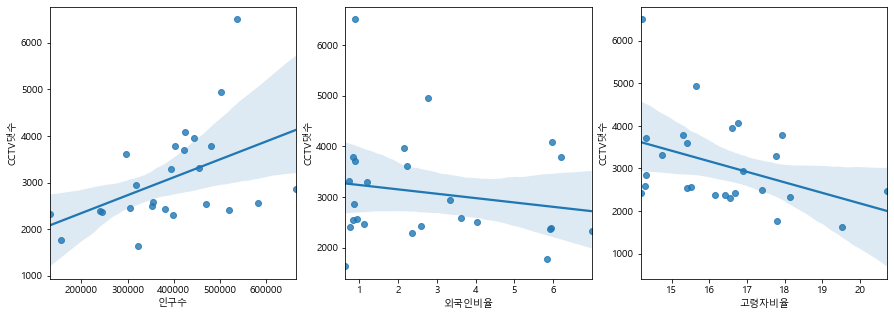

In [18]:
fig, axs = plt.subplots(nrows=1, ncols =3, figsize = (15, 5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x = feature, y='CCTV댓수', data = df, ax = axs[i])

In [19]:
# enumerate 쓸 경우 앞의 0, 1까지 같이 나온다

for i, feature in enumerate(features):
    print(i, feature)


0 인구수
1 외국인비율
2 고령자비율


* 구별 cctv 댓수

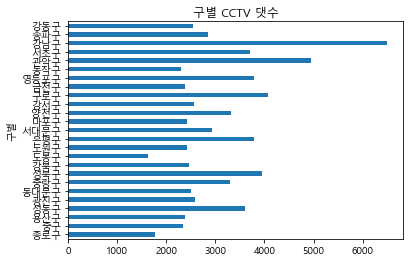

In [20]:
df['CCTV댓수'].plot(kind = 'barh')
plt.title('구별 CCTV 댓수')
plt.show()

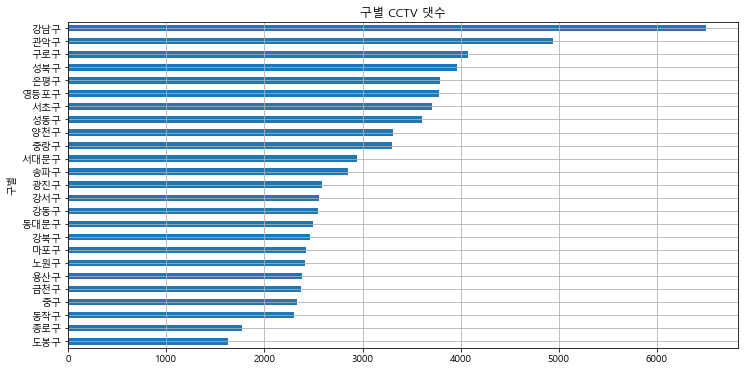

In [21]:
df['CCTV댓수'].sort_values().plot(kind = 'barh', grid = True, figsize = (12, 6))
plt.title('구별 CCTV 댓수')
plt.show()

* 인구대비 CCTV 비율

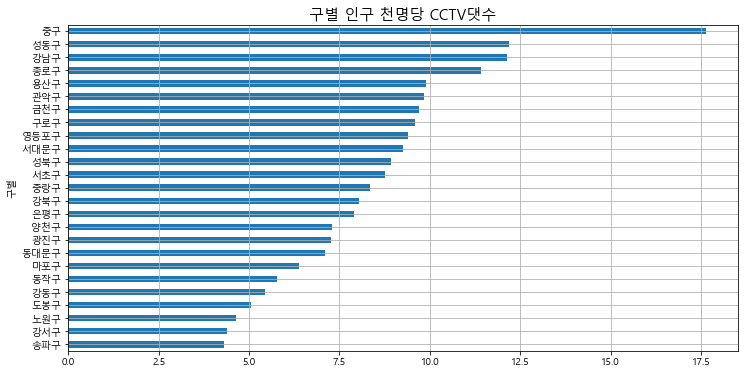

In [22]:
df['cctv비율'] = round(df['CCTV댓수'] / df['인구수'] * 1000, 2)
df['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (12, 6))
plt.title('구별 인구 천명당 CCTV댓수', fontsize = 15)
plt.show()

* 인구수와 CCTV 댓수 분석

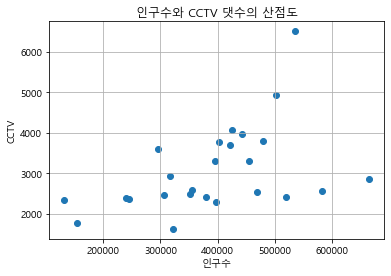

In [23]:
# 산점도(Scatter plot)
plt.scatter(x = df['인구수'], y = df['CCTV댓수'])
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

* 회귀선

In [25]:
weight, bias = np.polyfit(df['인구수'], df['CCTV댓수'], 1)
weight, bias

(0.0038511976508863724, 1572.3151359747483)

In [29]:
xs = np.array([100000, 700000])
ys = weight * xs + bias
ys

array([1957.43490106, 4268.1534916 ])

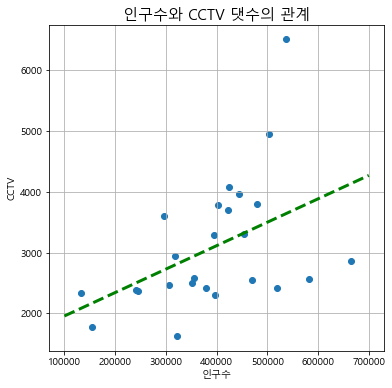

In [31]:
plt.figure(figsize = (6, 6))
plt.scatter(x = df['인구수'], y = df['CCTV댓수'])
plt.plot(xs, ys, 'g--', lw = 3)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

* 회귀선과 산점도 사이의 오차

In [35]:
# abs : 절댓값

df['오차'] = abs(df['CCTV댓수'] - round(df['인구수']*weight + bias, 2))
df_sort = df.sort_values('오차', ascending= False)
df_sort.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,
강남구,6502,61.64,536107,4732,76184,0.88,14.21,12.13,2865.03
관악구,4942,49.91,502698,13898,78647,2.76,15.64,9.83,1433.70
송파구,2854,203.19,664341,5671,95164,0.85,14.32,4.30,1276.82
강서구,2560,78.53,582995,5476,90404,0.94,15.51,4.39,1257.54
도봉구,1629,82.82,322419,2054,62894,0.64,19.51,5.05,1185.01


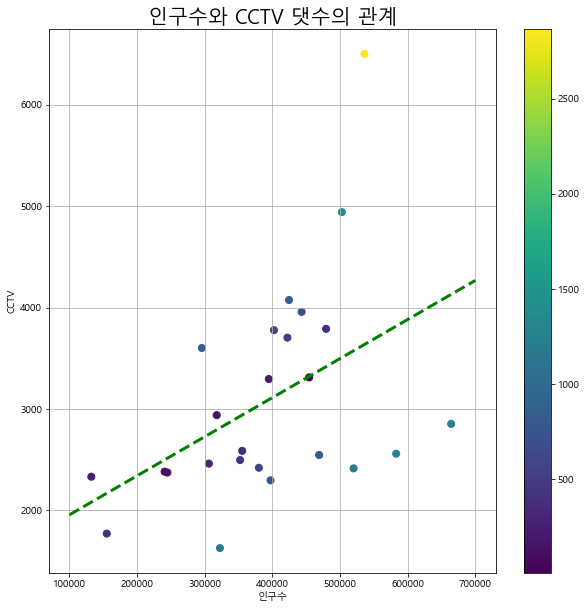

In [36]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['인구수'], y = df['CCTV댓수'], c = df['오차'], s=50)
plt.plot(xs, ys, 'g--', lw = 3)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize = 20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

* 최종그림

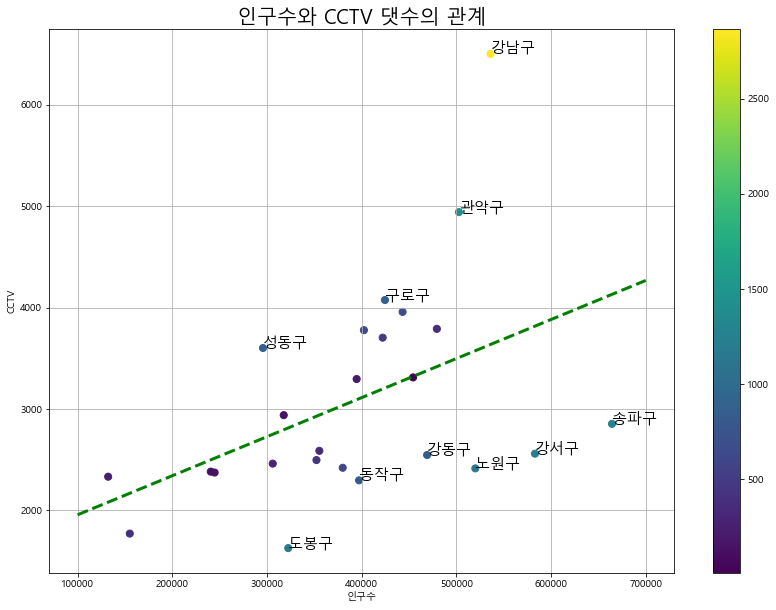

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize = (14, 10))

# c = df['오차'] 입력시 color map에서 해당 숫자에 해당하는 색상이 나온다

plt.scatter(x = df['인구수'], y = df['CCTV댓수'], c = df['오차'], s=50)
plt.plot(xs, ys, 'g--', lw = 3)
for i in range(10):
    plt.text(df_sort['인구수'][i], df_sort['CCTV댓수'][i],
             df_sort.index[i], fontsize = 15)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize = 20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')

# Anscombe's Quartet

In [47]:
ans = sns.load_dataset('anscombe')
ans.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [39]:
ans.shape

(44, 3)

* dataset I 에 대해 그래프를 그려봄

In [46]:
ds = ans[ans['dataset'] == 'I']
ds

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


* 회귀식 y = 0.5 * x + 3

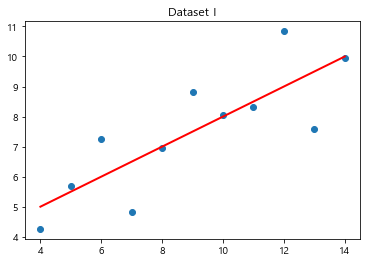

In [42]:
plt.scatter(ds['x'], ds['y'])
plt.plot([4, 14], [5, 10], 'r-', lw = 2)
plt.title('Dataset I')
plt.show()

* 4개의 그래프를 하나의 바탕에 그리기

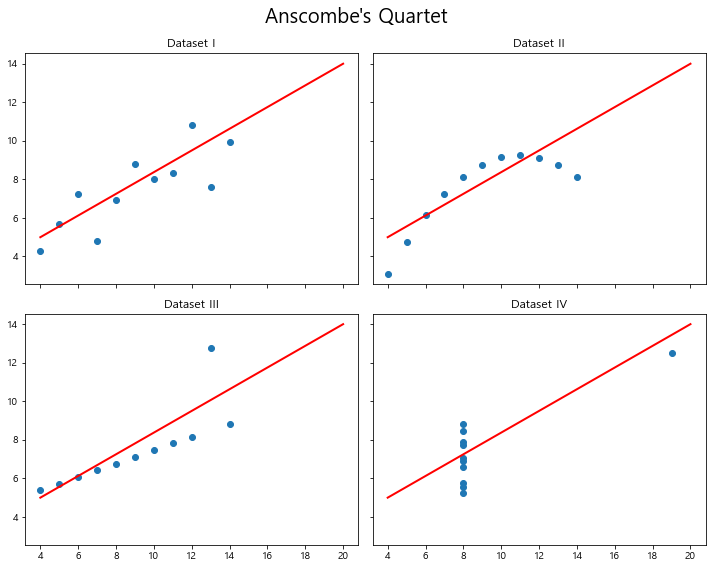

In [55]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8), sharex = True, sharey = True)
for i, roman in enumerate(['I', 'II', 'III', 'IV']): # 각각이 0, 1, 2, 3번 인덱스(enumerate)
    ax = axs[i//2, i%2]
    ds = ans[ans['dataset'] == roman]
    ax.scatter(ds['x'], ds['y'])
    ax.plot([4, 20], [5, 14], 'r-', lw = 2)
    ax.set_title(f'Dataset {roman}')

plt.suptitle("Anscombe's Quartet", fontsize = 20)
plt.tight_layout()
plt.show()